# SEQUENTIAL ANALYSIS

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)
    
from sequential import sequential_p_values

In [3]:
# Simulate cumulative lift observations
np.random.seed(42)
n_looks = 10  # number of interim looks
true_lift = 0.03  # 3% lift
se_base = 0.05  # base standard error

# Simulate observed cumulative lift at each look (with noise)
# The `sequential_p_values` function is designed for this type of input.
lift_obs = np.cumsum(np.random.normal(true_lift/n_looks, se_base, n_looks))
se_obs = np.full(n_looks, se_base)

In [4]:
# Run sequential analysis
seq_res = sequential_p_values(
    lift_series=pd.Series(lift_obs),
    se_series=pd.Series(se_obs),
    max_looks=n_looks,
    alpha=0.05
)

In [5]:
# Display results
# The output columns are 'look', 'lift', 'se', 'z', 'p', 'alpha_boundary', 'stop'
print(seq_res)

   look      lift    se         z             p  alpha_boundary   stop
0     1  0.027836  0.05  0.556714  5.777227e-01    5.720320e-10  False
1     2  0.023922  0.05  0.478450  6.323301e-01    1.172645e-05  False
2     3  0.059307  0.05  1.186138  2.355677e-01    3.457196e-04  False
3     4  0.138458  0.05  2.769168  5.619961e-03    1.941913e-03  False
4     5  0.129751  0.05  2.595015  9.458683e-03    5.574597e-03  False
5     6  0.121044  0.05  2.420878  1.548308e-02    1.139642e-02  False
6     7  0.203005  0.05  4.060091  4.905365e-05    1.914964e-02   True
7     8  0.244376  0.05  4.887525  1.021113e-06    2.842963e-02   True
8     9  0.223903  0.05  4.478051  7.532758e-06    3.883004e-02   True
9    10  0.254031  0.05  5.080611  3.762226e-07    5.000000e-02   True


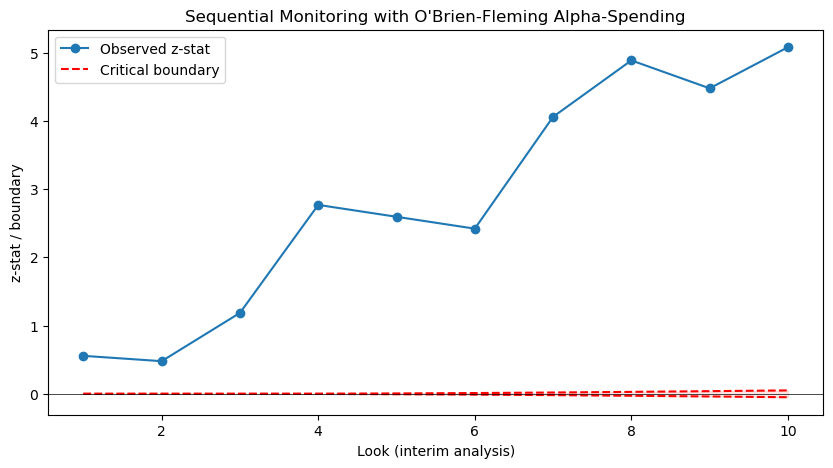

In [6]:
# Visualization: sequential boundaries
plt.figure(figsize=(10,5))
plt.plot(seq_res['look'], seq_res['z'], marker='o', label='Observed z-stat')
plt.plot(seq_res['look'], seq_res['alpha_boundary'], linestyle='--', color='red', label='Critical boundary')
plt.plot(seq_res['look'], -seq_res['alpha_boundary'], linestyle='--', color='red')
plt.fill_between(seq_res['look'], -seq_res['alpha_boundary'], seq_res['alpha_boundary'], color='red', alpha=0.1)
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel("Look (interim analysis)")
plt.ylabel("z-stat / boundary")
plt.title("Sequential Monitoring with O'Brien-Fleming Alpha-Spending")
plt.legend()
plt.show()

In [7]:
# Interpretation
for i, stop in enumerate(seq_res['stop']):
    if stop:
        print(f"Stop the experiment at look {i+1}: observed z-stat crosses boundary.")
        break
else:
    print("No stopping boundary crossed; continue experiment.")

Stop the experiment at look 7: observed z-stat crosses boundary.
